# Oberflächen erstellen
In diesem Notebook erstellen wir eine Oberfläche (Mesh) aus einem 3D-Datensatz eines simulierten 3D-Binärbilddatensatzes.

In [1]:
import napari_process_points_and_surfaces as nppas
import pyclesperanto_prototype as cle
import vedo

from branchoid import branchoid

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
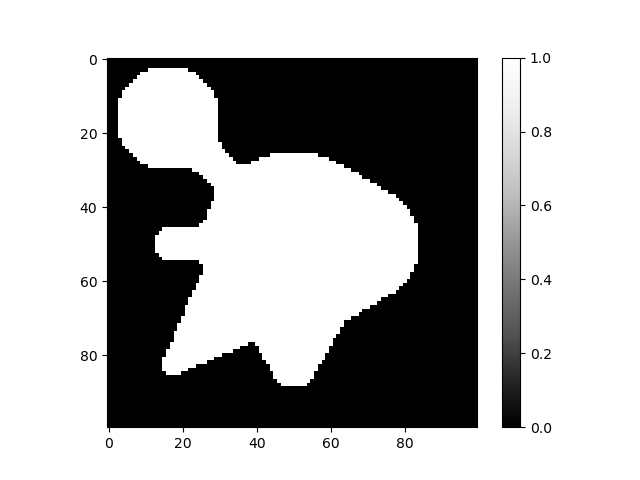
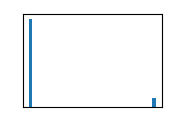

In [2]:
binary_image = branchoid()
binary_image

## Oberflächen generieren
Zuerst generieren wir eine Oberfläche aus dem Binärbild. In diesem Fall nehmen wir _alle_ Pixel mit Nicht-Null-Werten und verwandeln sie in eine Oberfläche.

In [3]:
surface = nppas.all_labels_to_surface(binary_image)

Das resultierende Objekt wird in Jupyter Notebooks so visualisiert:

(array([[25.5, 44. , 47. ],
        [26. , 43.5, 47. ],
        [26. , 44. , 46.5],
        ...,
        [74.5, 56. , 51. ],
        [74.5, 56. , 52. ],
        [74.5, 56. , 53. ]], dtype=float32),
 array([[    2,     1,     0],
        [    4,     3,     0],
        [    4,     0,     1],
        ...,
        [19038, 18870, 18872],
        [19038, 18872, 19039],
        [19039, 18872, 18852]], dtype=int64))
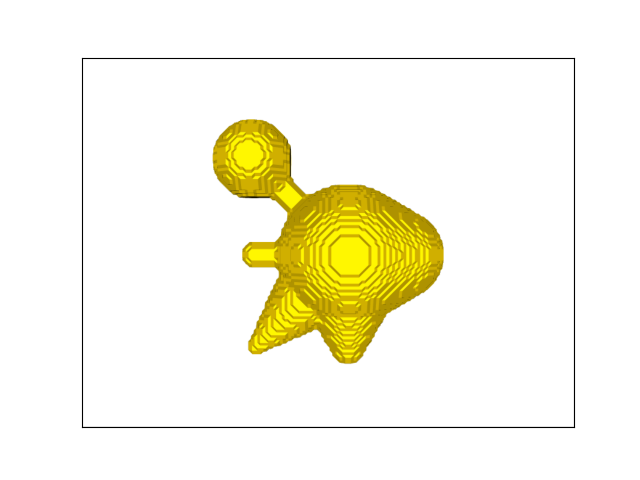

In [4]:
surface

Technisch gesehen handelt es sich um ein Tupel.

In [5]:
isinstance(surface, tuple)

True

Das Tupel enthält Vertices und Faces.

In [6]:
vertices, faces = surface

Vertices sind Listen von Listen von Z/Y/X-Koordinaten im 3D-Raum.

In [7]:
vertices

array([[25.5, 44. , 47. ],
       [26. , 43.5, 47. ],
       [26. , 44. , 46.5],
       ...,
       [74.5, 56. , 51. ],
       [74.5, 56. , 52. ],
       [74.5, 56. , 53. ]], dtype=float32)

Faces sind Listen von Listen von Indizes. Jedes Dreieck hat drei Punktkoordinaten, die wie folgt indiziert sind:

In [8]:
faces

array([[    2,     1,     0],
       [    4,     3,     0],
       [    4,     0,     1],
       ...,
       [19038, 18870, 18872],
       [19038, 18872, 19039],
       [19039, 18872, 18852]], dtype=int64)

## Oberflächen aus einzelnen Labels
Wenn wir ein Labelbild als Ausgangspunkt haben, können wir auch einzelne Objekte in Oberflächen umwandeln.

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint32)
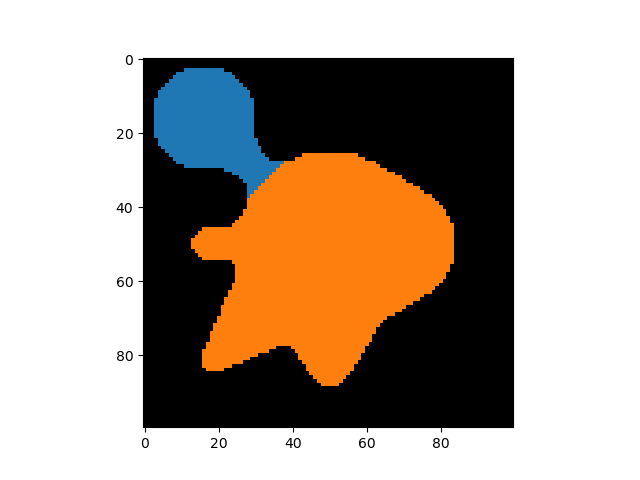

In [9]:
labels = cle.voronoi_otsu_labeling(binary_image, spot_sigma=6)
labels

(array([[26., 42., 49.],
        [26., 43., 48.],
        [25., 43., 49.],
        ...,
        [75., 57., 49.],
        [75., 57., 50.],
        [75., 57., 51.]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    2],
        [   2,    4,    0],
        ...,
        [8094, 8276, 8095],
        [8095, 8276, 8277],
        [8095, 8277, 8083]], dtype=int64))
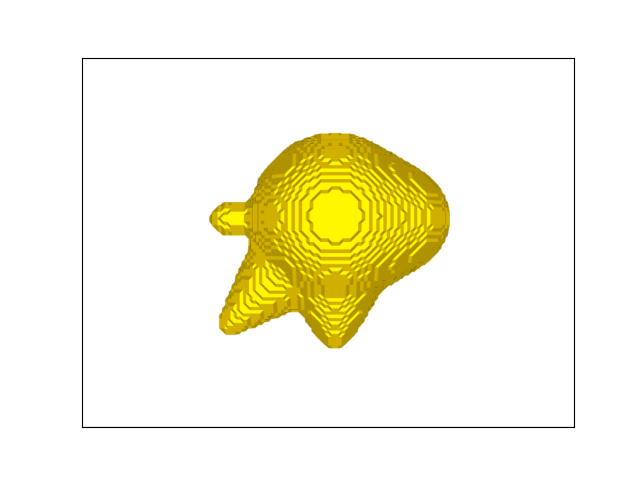

In [10]:
nppas.largest_label_to_surface(labels)

(array([[37., 10., 15.],
        [37., 11., 14.],
        [36., 11., 15.],
        ...,
        [64., 21., 15.],
        [64., 21., 16.],
        [64., 21., 17.]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    2],
        [   2,    4,    0],
        ...,
        [2375, 2470, 2376],
        [2376, 2470, 2471],
        [2376, 2471, 2367]], dtype=int64))
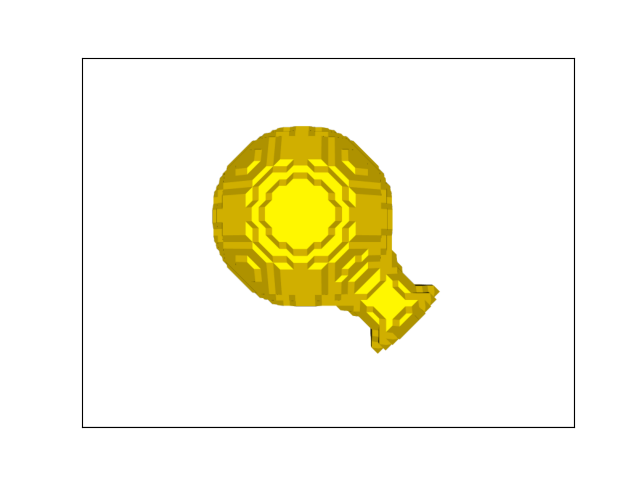

In [11]:
nppas.label_to_surface(labels, label_id=1)

(array([[26., 42., 49.],
        [26., 43., 48.],
        [25., 43., 49.],
        ...,
        [75., 57., 49.],
        [75., 57., 50.],
        [75., 57., 51.]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    2],
        [   2,    4,    0],
        ...,
        [8094, 8276, 8095],
        [8095, 8276, 8277],
        [8095, 8277, 8083]], dtype=int64))
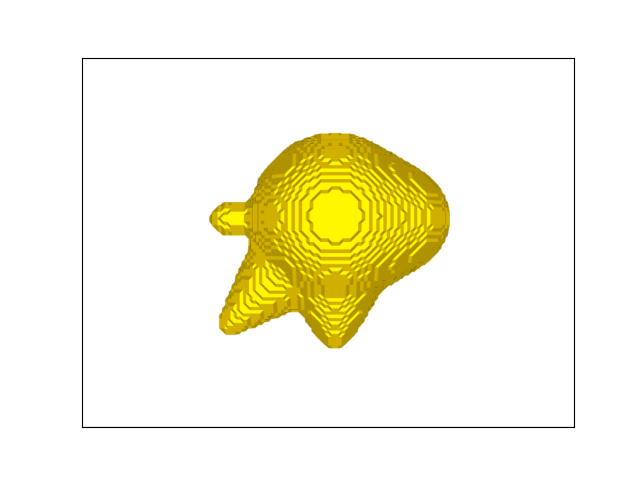

In [12]:
nppas.label_to_surface(labels, label_id=2)

## Oberflächen mit vedo erstellen

Vedo bietet auch Funktionen zum Erstellen von Oberflächen wie `iso_surface()`.

<Mesh(0x00000222F6B23EB0) at 0x00000222F821A280>
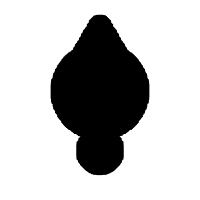

In [13]:
volume = vedo.Volume(binary_image)

iso_surface = volume.isosurface()
iso_surface

Die resultierende Datenstruktur ist ein vedo Mesh. Sie können auch auf dessen Punkte und Flächen zugreifen.

In [14]:
iso_surface.points()

array([[49.       , 11.       ,  2.3333333],
       [50.       , 11.       ,  2.3333333],
       [51.       , 11.       ,  2.3333333],
       ...,
       [50.       , 55.       , 83.666664 ],
       [51.       , 55.       , 83.666664 ],
       [52.       , 55.       , 83.666664 ]], dtype=float32)

In [15]:
iso_surface.faces()[:10]

[[0, 92, 104],
 [0, 1, 93],
 [92, 0, 93],
 [1, 2, 94],
 [93, 1, 94],
 [94, 2, 105],
 [3, 106, 118],
 [3, 4, 107],
 [106, 3, 107],
 [104, 107, 4]]

## Übung
Laden Sie den `skimage.data.cells3d` Datensatz, extrahieren Sie den zweiten Kanal und erstellen Sie ein Oberflächennetz aus den Zellkernen.